In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("CreditCardFraudDetection") \
    .getOrCreate()

In [4]:
# Charger les données
file_path = "creditcard.csv"  
data_df = spark.read.csv(file_path, header=True, inferSchema=True)
data_df.show(5)

+----+------------------+-------------------+----------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|              V3|                V4|                 V5|                 V6|                 V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|               V16|               V17|                V18|               V19|                V20|                 V21|                V22|     

In [5]:
data_df.show(10)

+----+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+------------------+-------------------+-------------------+--------------------+-------------------+------+-----+
|Time|                V1|                 V2|                V3|                V4|                 V5|                 V6|                  V7|                V8|                V9|                V10|               V11|               V12|               V13|               V14|               V15|                V16|                V17|                V18|                V19|                V20|                 V21|          

In [6]:

data_df.printSchema()


root
 |-- Time: double (nullable = true)
 |-- V1: double (nullable = true)
 |-- V2: double (nullable = true)
 |-- V3: double (nullable = true)
 |-- V4: double (nullable = true)
 |-- V5: double (nullable = true)
 |-- V6: double (nullable = true)
 |-- V7: double (nullable = true)
 |-- V8: double (nullable = true)
 |-- V9: double (nullable = true)
 |-- V10: double (nullable = true)
 |-- V11: double (nullable = true)
 |-- V12: double (nullable = true)
 |-- V13: double (nullable = true)
 |-- V14: double (nullable = true)
 |-- V15: double (nullable = true)
 |-- V16: double (nullable = true)
 |-- V17: double (nullable = true)
 |-- V18: double (nullable = true)
 |-- V19: double (nullable = true)
 |-- V20: double (nullable = true)
 |-- V21: double (nullable = true)
 |-- V22: double (nullable = true)
 |-- V23: double (nullable = true)
 |-- V24: double (nullable = true)
 |-- V25: double (nullable = true)
 |-- V26: double (nullable = true)
 |-- V27: double (nullable = true)
 |-- V28: double (nulla

In [7]:
data_df.describe().show()

+-------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+
|summary|             Time|                  V1|                  V2|                  V3|                  V4|                  V5|                  V6|                  V7|                  V8|                  V9|                 V10|                 V11|                 V12|                 V13|                 V14|                 V15|  

In [8]:
from pyspark.ml.feature import VectorAssembler, StringIndexer


In [9]:
label_indexer = StringIndexer(inputCol="Class", outputCol="label")

In [10]:
feature_cols = [col for col in data_df.columns if col not in ["Time", "Class"]]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

In [11]:
train_data, test_data = data_df.randomSplit([0.8, 0.2], seed=33)

In [12]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline

rf = RandomForestClassifier(featuresCol="features", labelCol="label", numTrees=100)

pipeline = Pipeline(stages=[label_indexer, assembler, rf])

model = pipeline.fit(train_data)


In [34]:
predictions = model.transform(test_data)

predictions.select("features", "label", "prediction", "probability").show()

+--------------------+-----+----------+--------------------+
|            features|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|[1.19185711131486...|  0.0|       0.0|[0.99975495361554...|
|[-0.8942860822028...|  0.0|       0.0|[0.99975495361554...|
|[-0.3382617524257...|  0.0|       0.0|[0.99975495361554...|
|[-5.4012576631582...|  0.0|       0.0|[0.99966575860707...|
|[0.69488477560733...|  0.0|       0.0|[0.99971615939563...|
|[0.24749112778366...|  0.0|       0.0|[0.99965170212336...|
|[1.32270726911234...|  0.0|       0.0|[0.99975495361554...|
|[1.24905471963177...|  0.0|       0.0|[0.99975495361554...|
|[-1.1694224579643...|  0.0|       0.0|[0.99975495361554...|
|[1.29566762073068...|  0.0|       0.0|[0.99975495361554...|
|[-1.3308815753247...|  0.0|       0.0|[0.99975495361554...|
|[1.11069200372208...|  0.0|       0.0|[0.99975495361554...|
|[1.15431211678574...|  0.0|       0.0|[0.99974454780381...|
|[-0.8999924493832...|  

Répartition des classes :
Class
0    284315
1       492
Name: count, dtype: int64


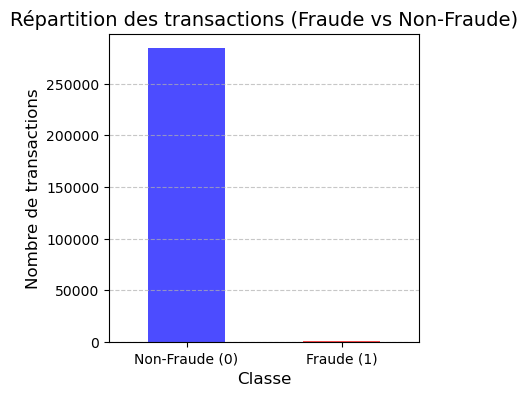

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = df["Class"].value_counts()

print("Répartition des classes :")
print(class_counts)

plt.figure(figsize=(4, 4))
class_counts.plot(kind="bar", color=["blue", "red"], alpha=0.7)
plt.title("Répartition des transactions (Fraude vs Non-Fraude)", fontsize=14)
plt.xlabel("Classe", fontsize=12)
plt.ylabel("Nombre de transactions", fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Fraude (0)", "Fraude (1)"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

